Here I choose an inbuilt dataset about daily air quality measurements in New York from May to September 1973. The dataset is located in the package “datasets”. It is a data frame with 153 observations on 6 variables including *Ozone*, *Solar.R*, *Wind*, *Temp*, *Month*, and *Day*. Details of the meaning of the variables are as follows: 

* Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island. 
* Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park. 
* Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport. 
* Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport. 
* Month: The month of the date. 
* Day: The day of the date. 

The goal of this project is to roughly explore which variable among *Solar.R*, *Wind*, and *Temp* is relative to volatility in *Ozone*. First, I delete rows containing NAs, display the data, draw a density plot and empirical cumulative distribution function (ECDF) stairstep plots as below: 


In [1]:
library(tidyverse)
AirQuality <- na.omit( airquality )
AirQuality$Month <- month.abb[AirQuality$Month]
head( AirQuality )

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<chr>,<int>
1,41,190,7.4,67,May,1
2,36,118,8.0,72,May,2
3,12,149,12.6,74,May,3
4,18,313,11.5,62,May,4
7,23,299,8.6,65,May,7
8,19,99,13.8,59,May,8


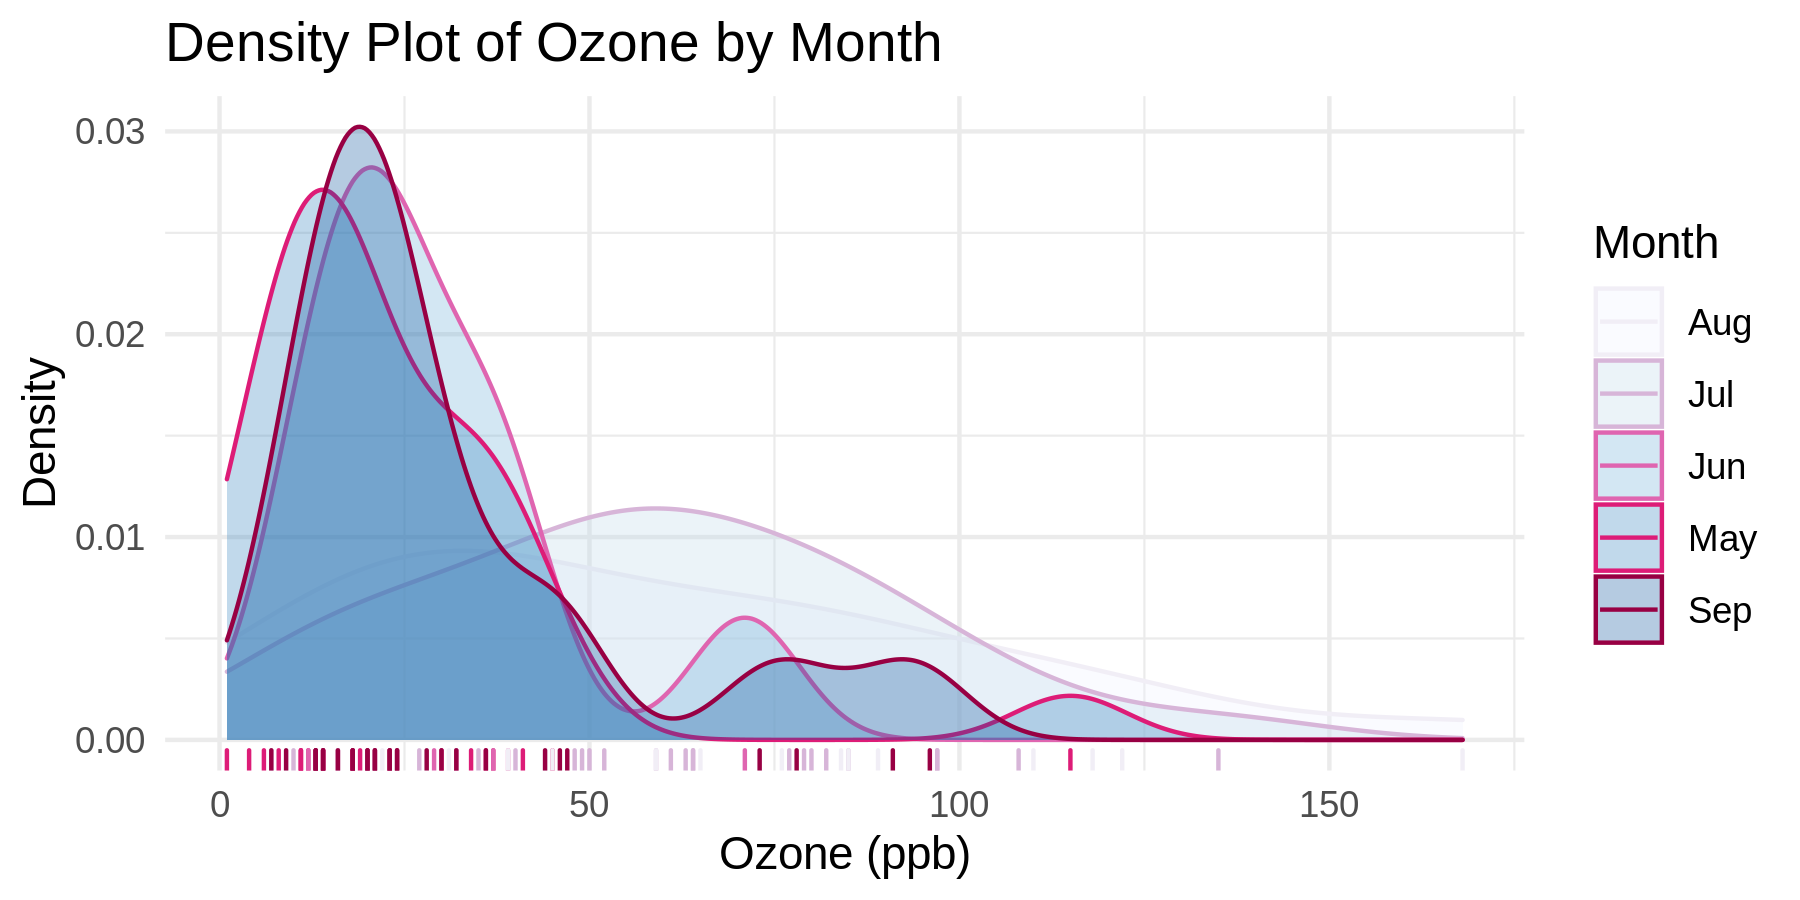

In [2]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
pdensity <- ggplot(AirQuality, aes(x = Ozone, color = Month, fill = Month))+ 
            geom_density(alpha = 0.3)+ 
            geom_rug(aes(color = Month))+ 
            scale_color_brewer(palette = "PuRd")+ 
            scale_fill_brewer(palette = "Blues")+ 
            theme_minimal()+ 
            theme(legend.position = "right")+ 
            labs(title = "Density Plot of Ozone by Month", x = "Ozone (ppb)", y = "Density")
pdensity

In [3]:
AQ_longer <- AirQuality %>% 
            pivot_longer(c(Ozone, Solar.R, Wind, Temp), names_to="Index", values_to="Values")
head(AQ_longer)

Month,Day,Index,Values
<chr>,<int>,<chr>,<dbl>
May,1,Ozone,41.0
May,1,Solar.R,190.0
May,1,Wind,7.4
May,1,Temp,67.0
May,2,Ozone,36.0
May,2,Solar.R,118.0


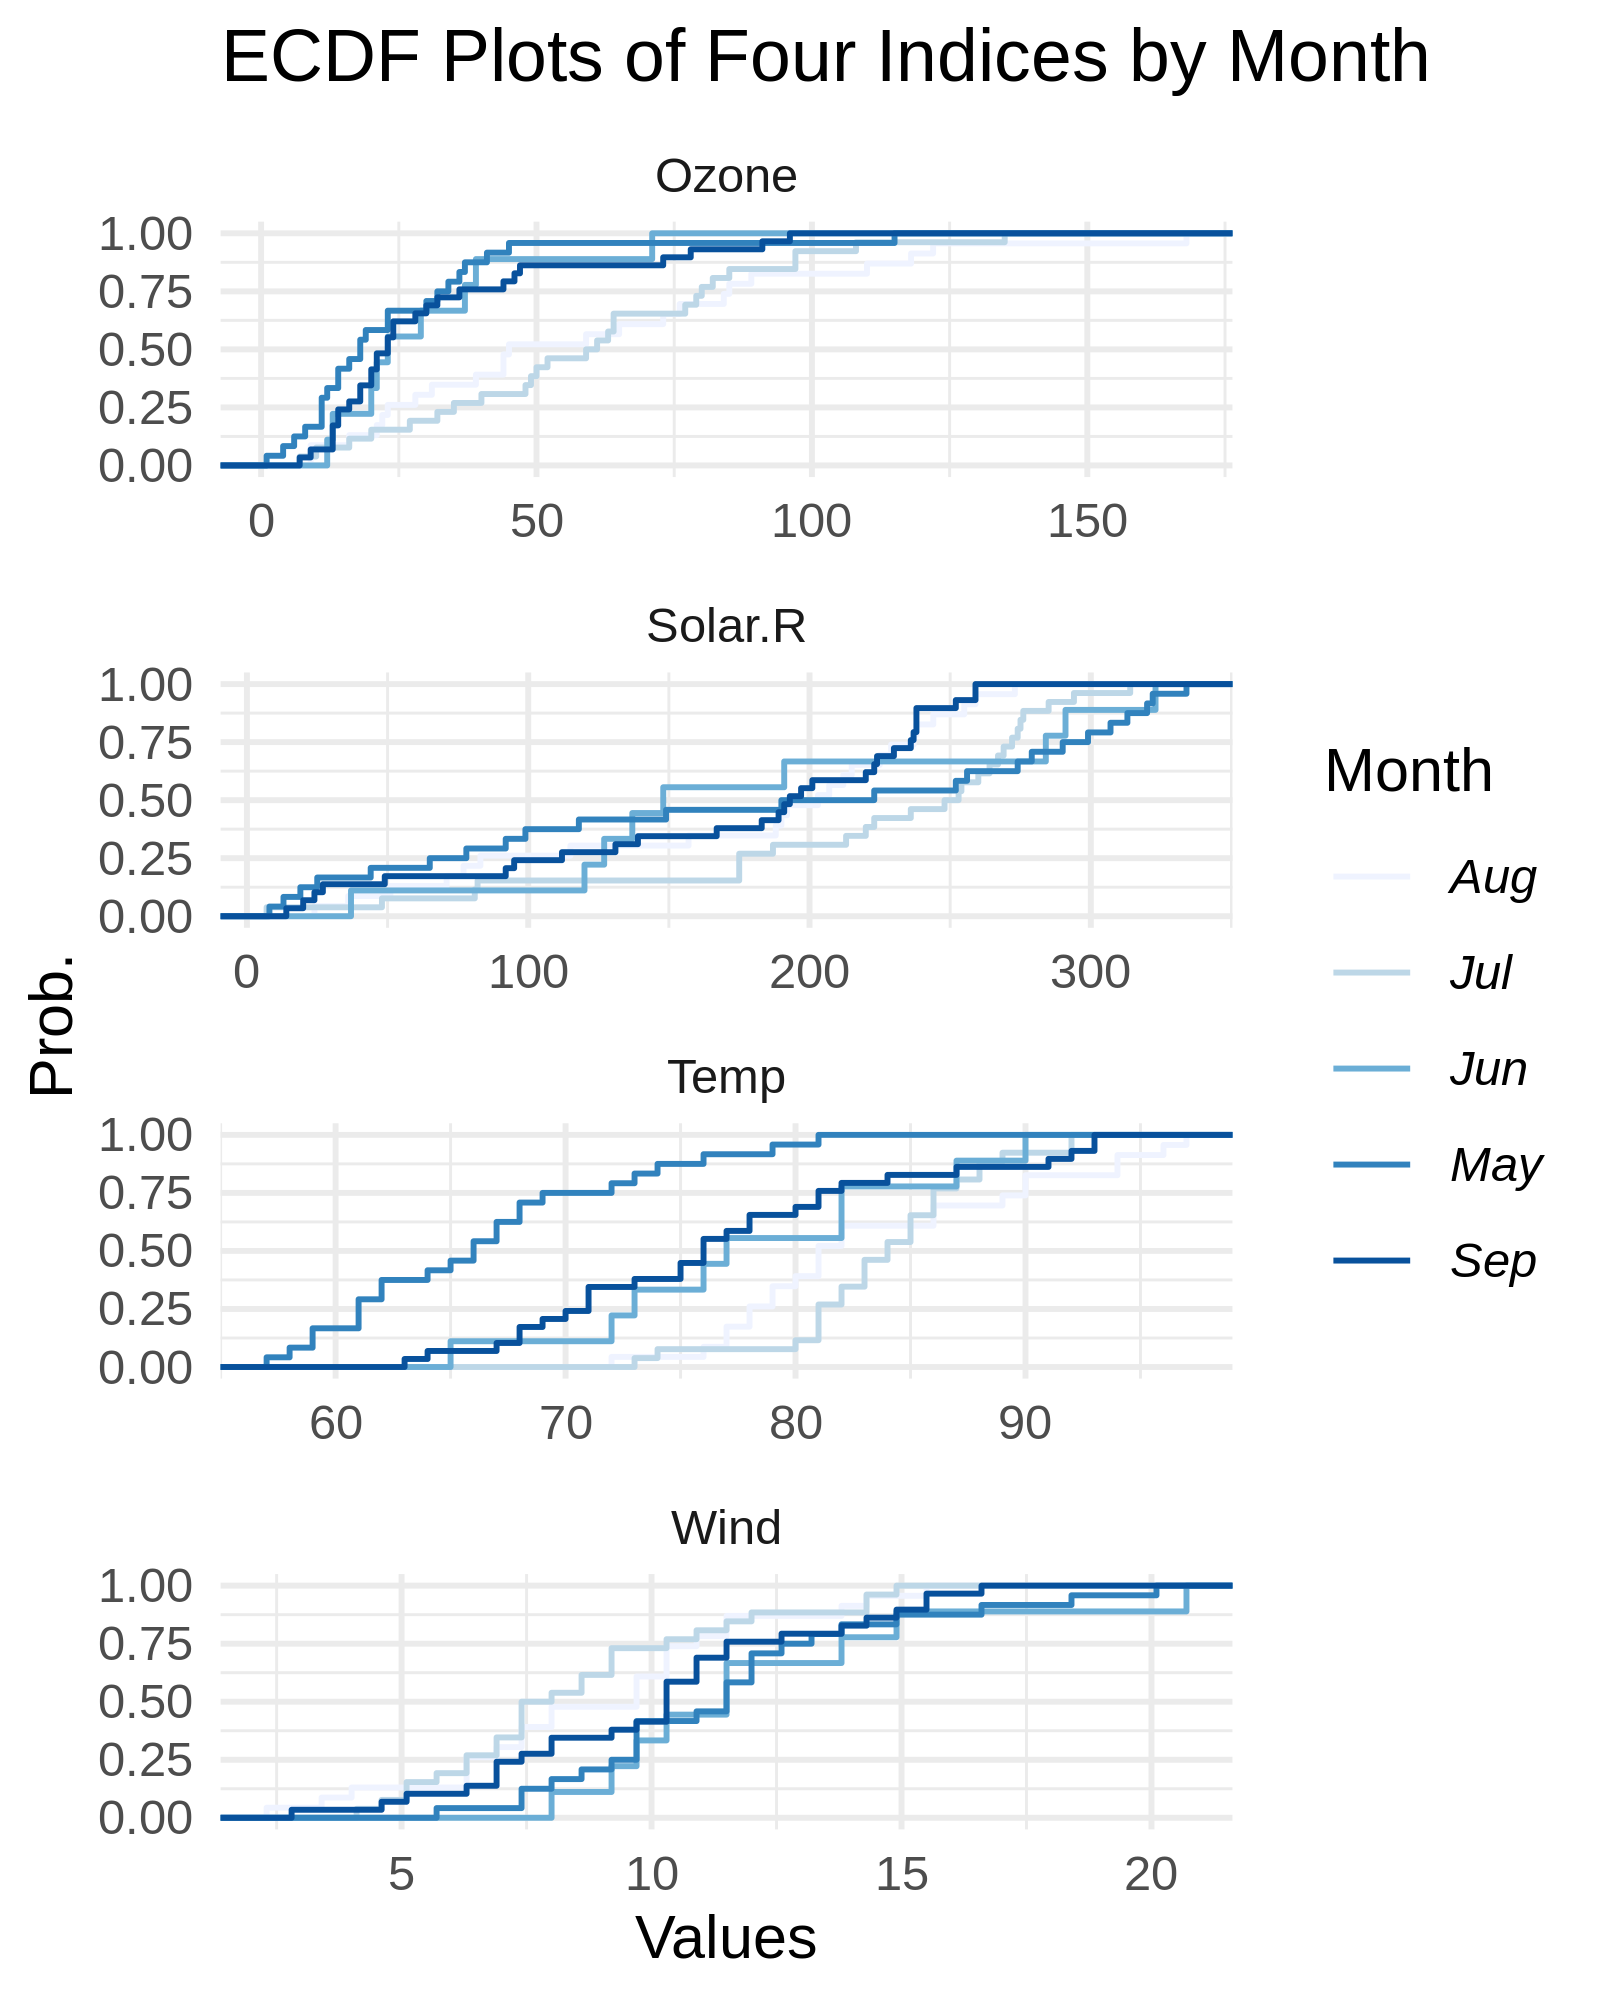

In [4]:
options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = 400)
pecdf <- ggplot( AQ_longer, aes(x = Values, group = Month, color = Month))+ 
        stat_ecdf(geom = "step", size = 0.5)+ 
        scale_color_brewer(palette = "Blues")+ 
        theme_minimal()+ 
        theme(legend.text = element_text(face = "italic"))+ 
        facet_wrap( .~Index, scales = "free_x", nc = 1)+ 
        labs(title = "ECDF Plots of Four Indices by Month", y = "Prob.")
pecdf

To further explore the linear association between *Ozone* and *Solar.R*, *Wind*, *Temp*, I draw scatter plots of *“Ozone~ Solar.R”*, *“Ozone~ Wind”*, *“Ozone~ Temp”* by *Month*, and a bar chart of means of the four indices by *Month*. What is noteworthy is that since the dimensions of the four indices are different, I transform the means into their scaled but not centered form. In this way, we can compare their relative magnitudes in one plot. 

In [5]:
AQ_longer2 <- AirQuality %>% 
            pivot_longer(c(Solar.R, Wind, Temp), names_to="Index", values_to="Values")
head(AQ_longer2)

Ozone,Month,Day,Index,Values
<int>,<chr>,<int>,<chr>,<dbl>
41,May,1,Solar.R,190.0
41,May,1,Wind,7.4
41,May,1,Temp,67.0
36,May,2,Solar.R,118.0
36,May,2,Wind,8.0
36,May,2,Temp,72.0


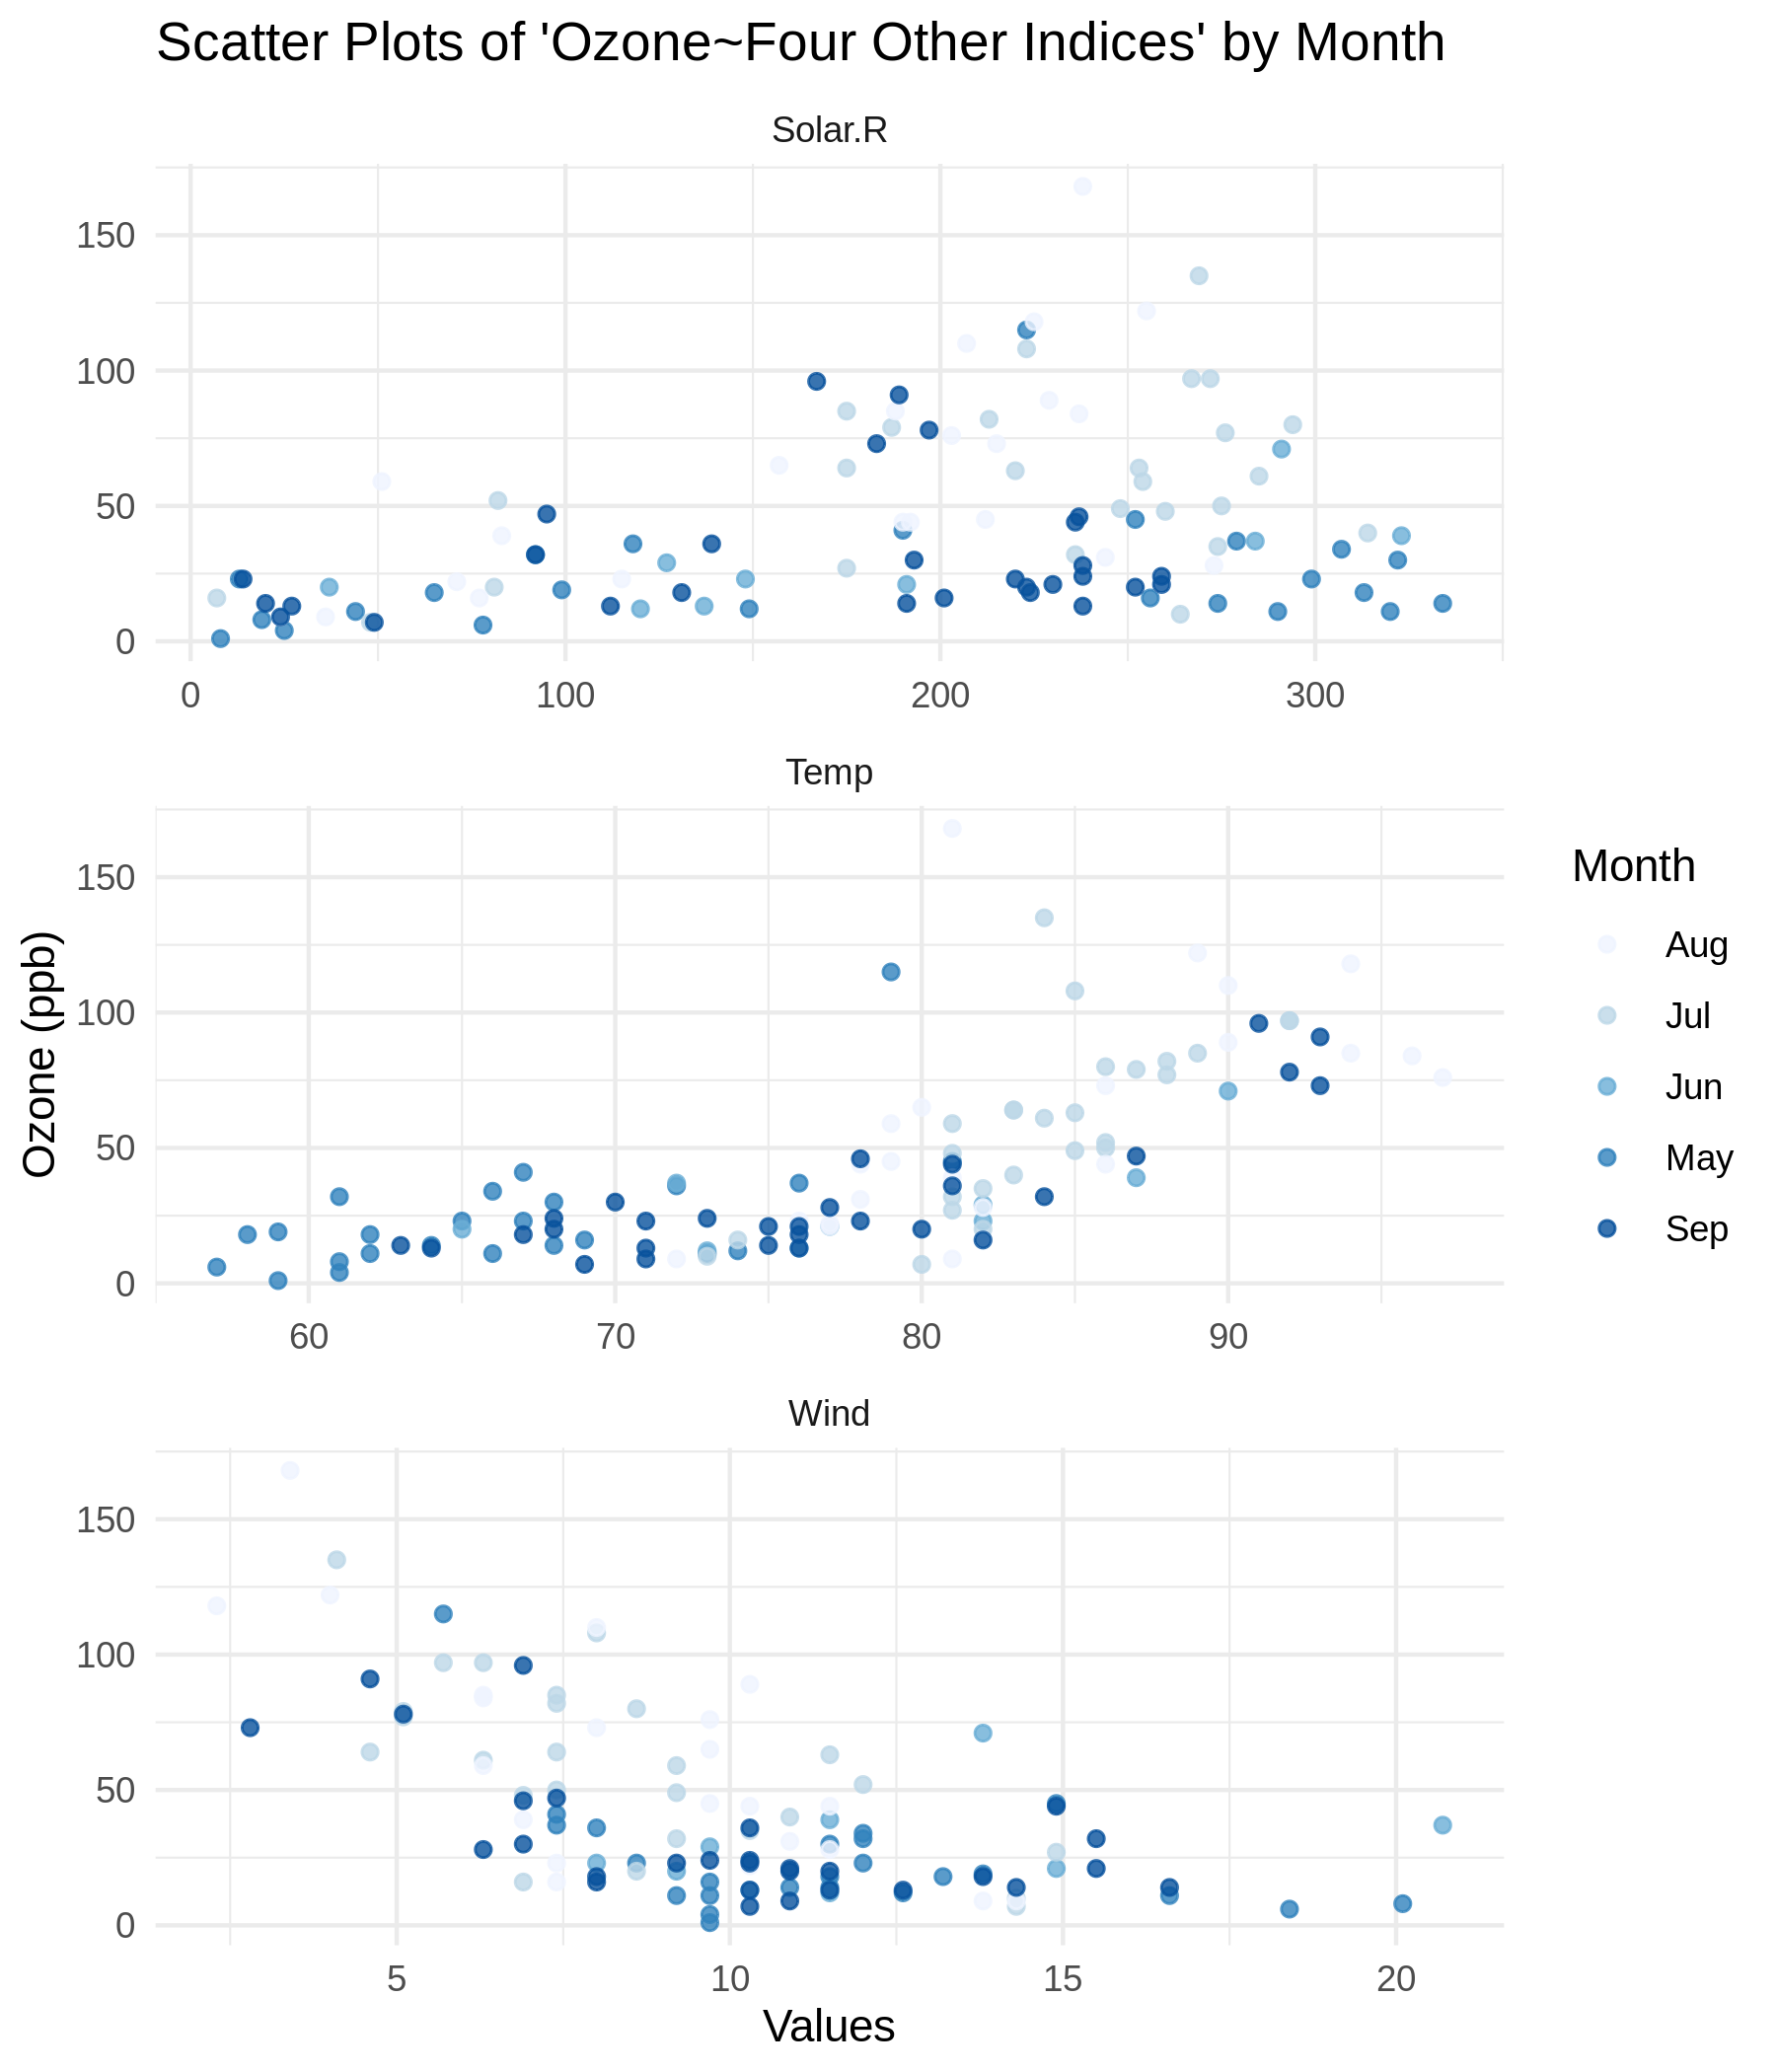

In [6]:
options(repr.plot.width = 6, repr.plot.height = 7, repr.plot.res = 300)
ppoint <- ggplot(AQ_longer2, aes(x = Values, y = Ozone, color = Month))+ 
        geom_point(alpha = 0.8)+ 
        scale_color_brewer(palette = "Blues")+ 
        theme_minimal()+ 
        facet_wrap(.~Index, scales = "free_x", nc = 1)+ 
        labs(title = "Scatter Plots of 'Ozone~Four Other Indices' by Month", y = "Ozone (ppb)")

ppoint

In [7]:
AQ_mean <- AirQuality %>% 
            group_by(Month) %>% 
            summarize(mean_ozone = mean(Ozone)/max(Ozone), 
                      mean_solar = mean(Solar.R)/max(Solar.R), 
                      mean_wind = mean(Wind)/max(Wind), 
                      mean_temp = mean(Temp)/max(Temp)) %>% 
            select(Month, starts_with("mean"))

AQ_mean <- cbind(AQ_mean[,1], scale(AQ_mean[,-1], center = F))
head(AQ_mean)

,Month,mean_ozone,mean_solar,mean_wind,mean_temp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Aug,0.8910446,0.9148454,0.8779050,0.8985862
2,Jul,1.0925069,0.9945347,0.8784419,0.9495615
3,Jun,1.0346715,0.8229728,0.9034427,0.9051410
4,May,0.5233918,0.7864486,0.8789456,0.8544625
5,Sep,0.8173029,0.9371089,0.9321312,0.8610978


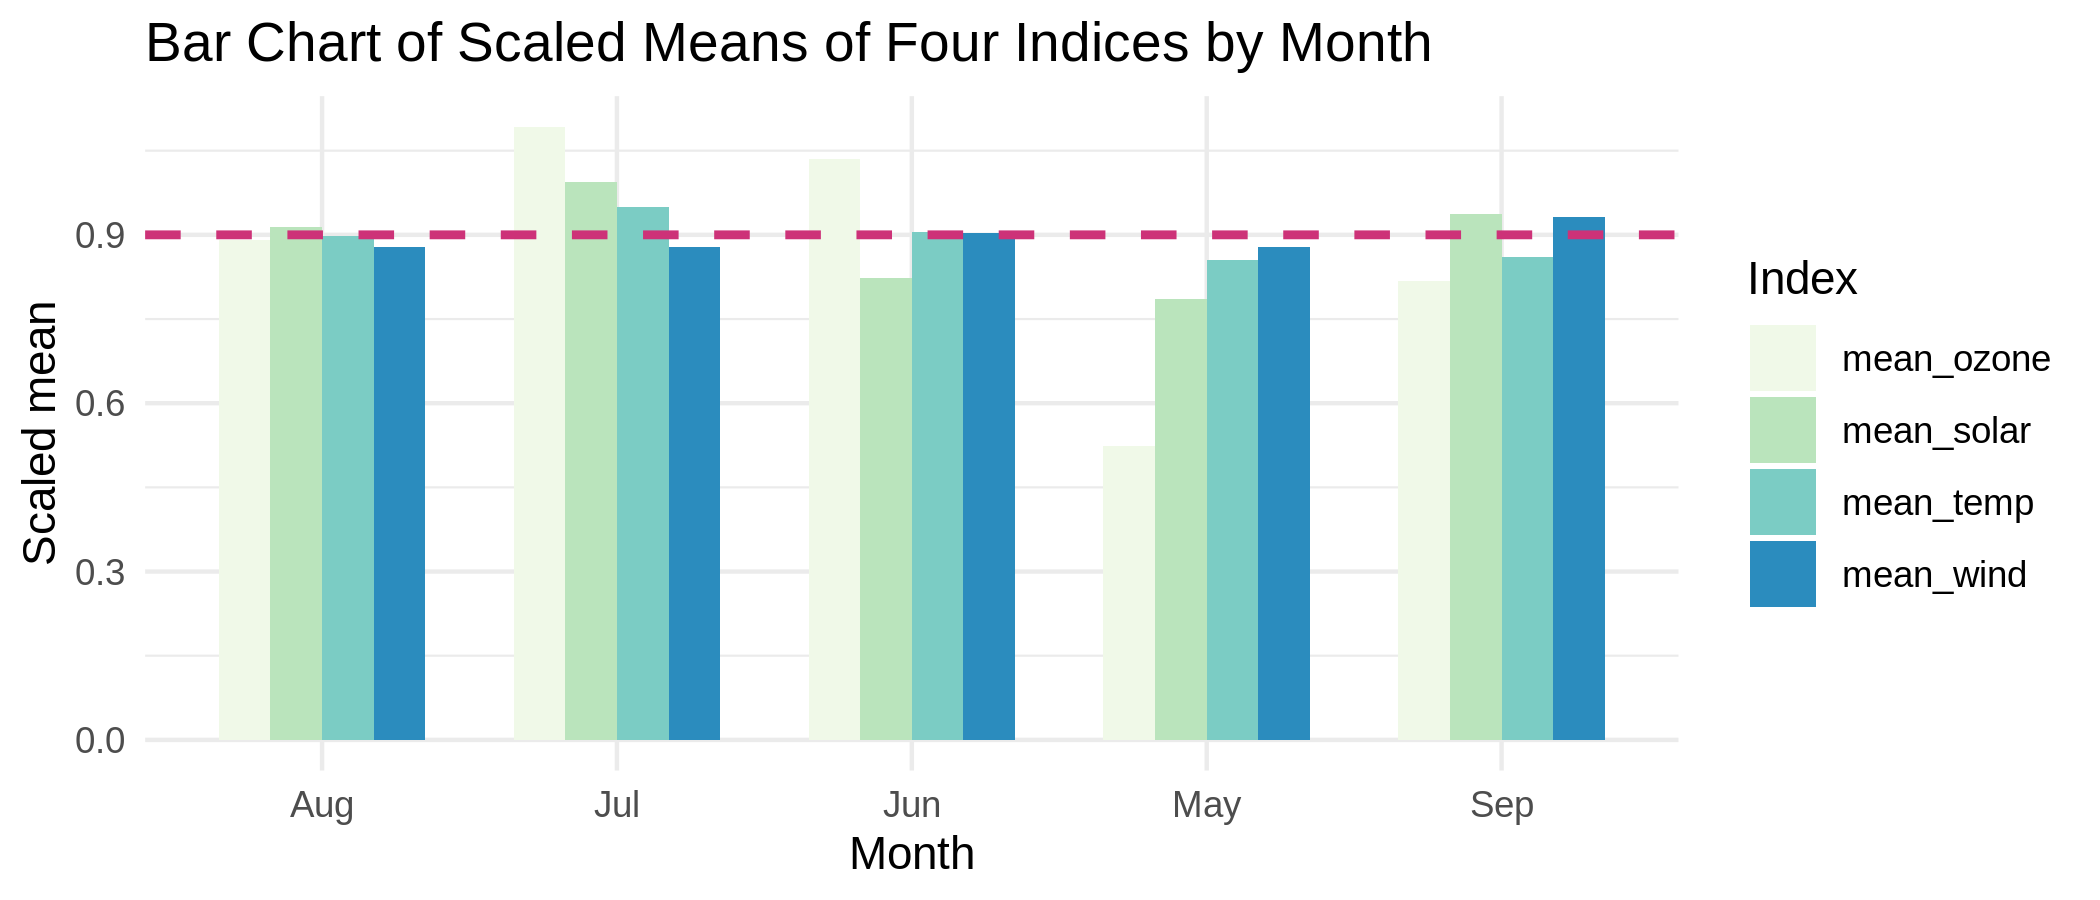

In [8]:
AQ_mean_longer <- AQ_mean %>% 
                    pivot_longer(!Month, names_to = "Means", values_to = "Values")

options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 300)
pbar <- ggplot(AQ_mean_longer, aes(x = Month, y = Values, fill = Means))+ 
        geom_bar(stat = "identity", position = "dodge", width = 0.7)+ 
        scale_fill_brewer(palette = "GnBu")+ 
        theme_minimal()+ 
        labs(title = "Bar Chart of Scaled Means of Four Indices by Month", fill = "Index", y = "Scaled mean")+ 
        geom_hline(yintercept = 0.9, linetype = "dashed", size = 1, color = "violetred3")
pbar

According to the scatter plot, we can see that *Ozone* and *Temp* are positively related while *Ozone* and *Wind* are negatively related. In the scatter plot of *Ozone~Solar.R*, there is not obvious linear association between the two indices. However, as is shown in the bar chart, the scaled means of *Ozone* and *Solar.R* has more volatility than the other two indices. To get rid of different dimensions and put *Ozone* and *Solar.R* in the same plot, I tried to draw the line plot below with two different y axis. As is shown, for some intervals, *Ozone* and *Solar.R* have similar volatility, while for others, there is a great gap between the two lines. 

In [9]:
AQ_ozone_solar <- AirQuality %>% 
                    mutate(Time = row_number()) %>% 
                    select(Time, Ozone, Solar.R)
head(AQ_ozone_solar)

,Time,Ozone,Solar.R
,<int>,<int>,<int>
1,1,41,190
2,2,36,118
3,3,12,149
4,4,18,313
7,5,23,299
8,6,19,99


Aug Jul Jun May Sep 
 23  49  58  82 111

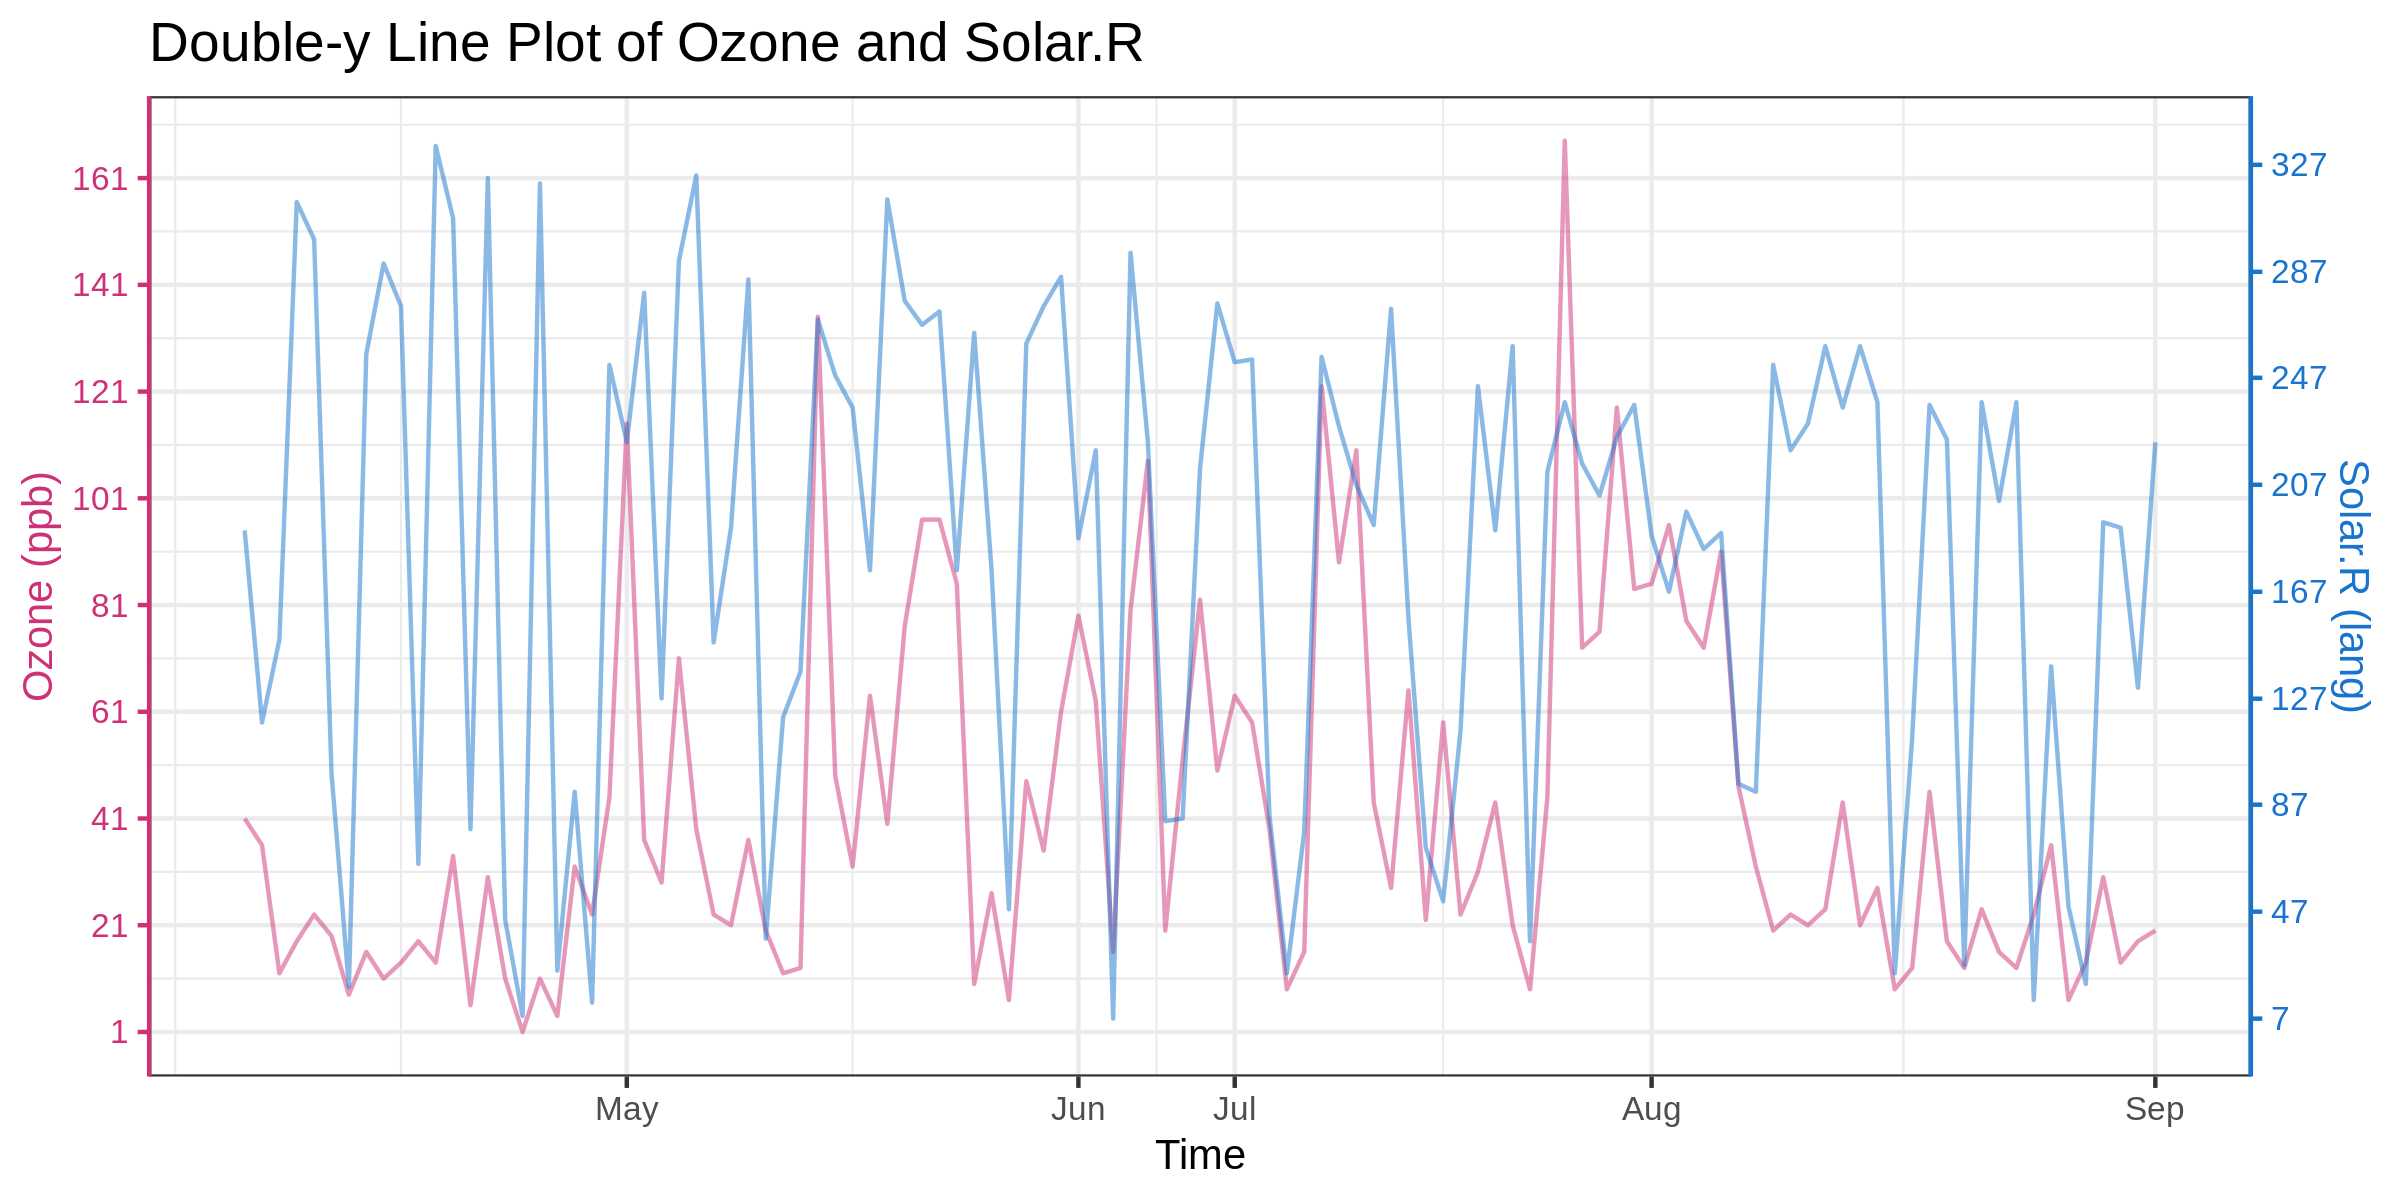

In [10]:
MonthNum <- table(AirQuality$Month)
cumsum(MonthNum)

options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)
pbiy <- ggplot(AQ_ozone_solar, aes(x = Time))+ 
        geom_line(aes(y = Ozone), size = .5, color = "violetred3", alpha = 0.5)+ 
        geom_line(aes(y = Solar.R/2), size = .5, color = "dodgerblue3", alpha = 0.5)+ 
        labs(title = "Double-y Line Plot of Ozone and Solar.R")+ 
        theme_bw()+ 
        theme(axis.title.y = element_text(color = "violetred3", size = 10), 
              axis.title.y.right = element_text(color = "dodgerblue3", size = 10), 
              axis.title.x = element_text(size = 10))+ 
        theme(axis.line.y.left = element_line(color = "violetred3"), 
              axis.line.y.right = element_line(color = "dodgerblue3"), 
              axis.ticks.y.left = element_line(color = "violetred3"), 
              axis.ticks.y.right = element_line(color = "dodgerblue3"), 
              axis.text.y.left = element_text(color = "violetred3", size = 8), 
              axis.text.y.right = element_text(color = "dodgerblue3", size = 8), 
              axis.text.x = element_text(size = 8))+ 
        scale_y_continuous(name = "Ozone (ppb)", 
                           limits = c(1, 168), 
                           breaks = seq(1, 168, 20), 
                           sec.axis = sec_axis(name = "Solar.R (lang)", 
                                               ~.*2, 
                                               breaks = c(seq(7, 334, 40))))+ 
        scale_x_continuous(name = "Time", 
                           breaks = c(23, 49, 58, 82, 111), 
                           labels = c("May", "Jun", "Jul", "Aug", "Sep"))
pbiy